Andrey_Bondarchuk_stepik_id_346032105

https://colab.research.google.com/drive/1ZNqLxAD3hc5cDLTqffPQJklgq3fwLE0_?usp=sharing

<img src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500, height=450>
<h3 style="text-align: center;"><b>Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ</b></h3>

---

### Задача определения частей речи, Part-Of-Speech Tagger (POS)

Мы будем решать задачу определения частей речи (POS-теггинга) с помощью скрытой марковской модели (HMM).

In [ ]:
import nltk
import pandas as pd
import numpy as np
from collections import OrderedDict, deque
from nltk.corpus import brown
import matplotlib.pyplot as plt

In [ ]:
!pip install -q torchtext==0.6.0

     |████████████████████████████████| 64 kB 2.2 MB/s 
     |████████████████████████████████| 1.2 MB 23.7 MB/s 


In [ ]:
import torchtext

In [ ]:
torchtext.__version__

'0.6.0'

In [ ]:
!pip install torchinfo

from torchinfo import summary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Вам в помощь http://www.nltk.org/book/

Загрузим brown корпус

In [ ]:
nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

Существует множество наборов грамматических тегов, или тегсетов, например:
* НКРЯ
* Mystem
* UPenn
* OpenCorpora (его использует pymorphy2)
* Universal Dependencies

<b>Существует не одна система тегирования, поэтому будьте внимательны, когда прогнозируете тег слов в тексте и вычисляете качество прогноза. Можете получить несправедливо низкое качество вашего решения.

На данный момент стандартом является **Universal Dependencies**. Подробнее про проект можно почитать [вот тут](http://universaldependencies.org/), а про теги — [вот тут](http://universaldependencies.org/u/pos/)

In [ ]:
nltk.download('universal_tagset')

[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.


True

<img src="https://4.bp.blogspot.com/-IcFli2wljs0/WrVCw3umY_I/AAAAAAAACYM/UJ_neoUAs3wF95dj2Ouf3BzxXzB_b2TbQCLcBGAs/s1600/postags.png">


Мы имеем массив предложений пар (слово-тег)

In [ ]:
brown_tagged_sents = brown.tagged_sents(tagset="universal")
brown_tagged_sents

[[('The', 'DET'), ('Fulton', 'NOUN'), ('County', 'NOUN'), ('Grand', 'ADJ'), ('Jury', 'NOUN'), ('said', 'VERB'), ('Friday', 'NOUN'), ('an', 'DET'), ('investigation', 'NOUN'), ('of', 'ADP'), ("Atlanta's", 'NOUN'), ('recent', 'ADJ'), ('primary', 'NOUN'), ('election', 'NOUN'), ('produced', 'VERB'), ('``', '.'), ('no', 'DET'), ('evidence', 'NOUN'), ("''", '.'), ('that', 'ADP'), ('any', 'DET'), ('irregularities', 'NOUN'), ('took', 'VERB'), ('place', 'NOUN'), ('.', '.')], [('The', 'DET'), ('jury', 'NOUN'), ('further', 'ADV'), ('said', 'VERB'), ('in', 'ADP'), ('term-end', 'NOUN'), ('presentments', 'NOUN'), ('that', 'ADP'), ('the', 'DET'), ('City', 'NOUN'), ('Executive', 'ADJ'), ('Committee', 'NOUN'), (',', '.'), ('which', 'DET'), ('had', 'VERB'), ('over-all', 'ADJ'), ('charge', 'NOUN'), ('of', 'ADP'), ('the', 'DET'), ('election', 'NOUN'), (',', '.'), ('``', '.'), ('deserves', 'VERB'), ('the', 'DET'), ('praise', 'NOUN'), ('and', 'CONJ'), ('thanks', 'NOUN'), ('of', 'ADP'), ('the', 'DET'), ('City

Первое предложение

In [ ]:
brown_tagged_sents[0]

[('The', 'DET'),
 ('Fulton', 'NOUN'),
 ('County', 'NOUN'),
 ('Grand', 'ADJ'),
 ('Jury', 'NOUN'),
 ('said', 'VERB'),
 ('Friday', 'NOUN'),
 ('an', 'DET'),
 ('investigation', 'NOUN'),
 ('of', 'ADP'),
 ("Atlanta's", 'NOUN'),
 ('recent', 'ADJ'),
 ('primary', 'NOUN'),
 ('election', 'NOUN'),
 ('produced', 'VERB'),
 ('``', '.'),
 ('no', 'DET'),
 ('evidence', 'NOUN'),
 ("''", '.'),
 ('that', 'ADP'),
 ('any', 'DET'),
 ('irregularities', 'NOUN'),
 ('took', 'VERB'),
 ('place', 'NOUN'),
 ('.', '.')]

Все пары (слово-тег)

In [ ]:
brown_tagged_words = brown.tagged_words(tagset='universal')
brown_tagged_words

[('The', 'DET'), ('Fulton', 'NOUN'), ...]

Проанализируйте данные, с которыми Вы работаете. Используйте `nltk.FreqDist()` для подсчета частоты встречаемости тега и слова в нашем корпусе. Под частой элемента подразумевается кол-во этого элемента в корпусе.

In [ ]:
from nltk.probability import FreqDist

In [ ]:
# Приведем слова к нижнему регистру
brown_tagged_words = list(map(lambda x: (x[0].lower(), x[1]), brown_tagged_words))

In [ ]:
print('Кол-во предложений: ', len(brown_tagged_sents))
tags = [tag for (word, tag) in brown_tagged_words] # наши теги
words = [word for (word, tag) in brown_tagged_words] # наши слова

tag_num = pd.Series(dict(FreqDist(tags))).sort_values(ascending=False) # тег - кол-во тега в корпусе #'''your code'''
word_num = pd.Series(dict(FreqDist(words))).sort_values(ascending=False) # слово - кол-во слова в корпусе #'''your code'''

Кол-во предложений:  57340


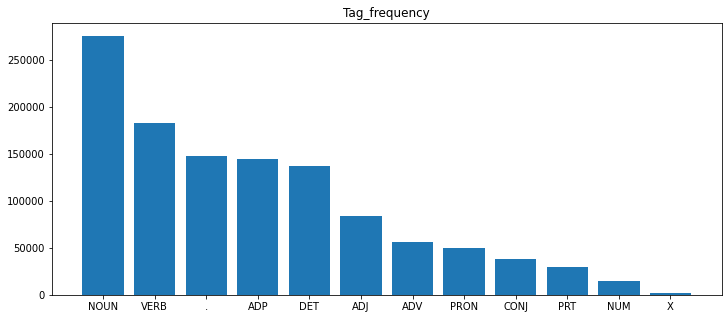

In [ ]:
plt.figure(figsize=(12, 5))
plt.bar(tag_num.index, tag_num.values)
plt.title("Tag_frequency")
plt.show()

In [ ]:
tag_num['NOUN'].sum()/tag_num.sum()

0.23730614747604187

In [ ]:
word_num[:5]

the    69971
,      58334
.      49346
of     36412
and    28853
dtype: int64

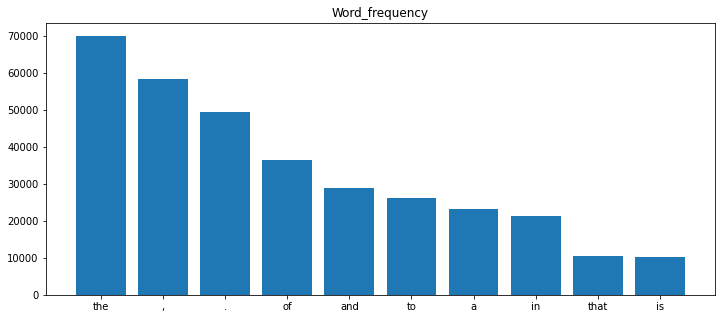

In [ ]:
plt.figure(figsize=(12, 5))
plt.bar(word_num.index[:10], word_num.values[:10])
plt.title("Word_frequency")
plt.show()

### Вопрос 1:
* Кол-во слова `cat` в корпусе?

In [ ]:
print('Кол-во слова cat в корпусе = {}'.format(word_num['cat']))

Кол-во слова cat в корпусе = 23


###  Ответ: Кол-во слова cat в корпусе = 23

### Вопрос 2:
* Самое популярное слово с самым популярным тегом? <br>(*сначала выбираете слова с самым популярным тегом, а затем выбираете самое популярное слово из уже выбранных*)

In [ ]:
most_popular_tag = tag_num.head(1).index.values[0]
print('Самый популярный тэг = <{}>'.format(most_popular_tag))

Самый популярный тэг = <NOUN>


In [ ]:
# слова с наиболее популярным тэгом
words_with_popular_tag = set([word for (word, tag) in brown_tagged_words if tag == most_popular_tag])

In [ ]:
len(words_with_popular_tag)

30246

In [ ]:
pd_most_popular_word_tag = word_num[words_with_popular_tag].sort_values(ascending=False)
pd_most_popular_word_tag

to               26158
a                23195
in               21337
for               9489
i                 5164
                 ...  
enos                 1
rotelli              1
blatz's              1
pencil-pusher        1
ukrainians           1
Length: 30246, dtype: int64

In [ ]:
print('Самое популярное слово это - <{}> с самым популярным тегом - <{}>'.format(pd_most_popular_word_tag.head(1).index.values[0], most_popular_tag))

Самое популярное слово это - <to> с самым популярным тегом - <NOUN>


### **Ответ:** Самое популярное слово это - **to** с самым популярным тегом - **NOUN**

Впоследствии обучение моделей может занимать слишком много времени, работайте с подвыборкой, например, только текстами определенных категорий.

Категории нашего корпуса:

In [ ]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

Будем работать с категорией humor

Cделайте случайное разбиение выборки на обучение и контроль в отношении 9:1. 

In [ ]:
brown_tagged_sents = brown.tagged_sents(tagset="universal", categories='humor')
# Приведем слова к нижнему регистру
my_brown_tagged_sents = []
for sent in brown_tagged_sents:
    my_brown_tagged_sents.append(list(map(lambda x: (x[0].lower(), x[1]), sent)))
my_brown_tagged_sents = np.array(my_brown_tagged_sents)

from sklearn.model_selection import train_test_split
train_sents, test_sents = train_test_split(my_brown_tagged_sents, test_size=0.1, random_state=0,) #'''your code'''

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


Посмотрим на пропорции разбиения

In [ ]:
len(train_sents)/len(test_sents)

8.933962264150944

Выборка разбита в отношении 1 к 9.

### Метод максимального правдоподобия для обучения модели

* $\normalsize S = s_0, s_1, ..., s_N$ - скрытые состояния, то есть различные теги
* $\normalsize O = o_0, o_1, ..., o_M$ - различные слова
* $\normalsize a_{i,j} = p(s_j|s_i)$ - вероятность того, что, находясь в скрытом состоянии $s_i$, мы попадем в состояние $s_j$ (элемент матрицы $A$)
* $\normalsize b_{k,j}=p(o_k|s_j)$ - вероятность того, что при скрытом состоянии $s_j$ находится слово $o_k$(элемент матрицы $B$)

$$\normalsize x_t \in O, y_t \in S$$
$\normalsize (x_t, y_t)$ - слово и тег, стоящие на месте $t$ $\Rightarrow$ 
* $\normalsize X$ - последовательность слов
* $\normalsize Y$ - последовательность тегов

Требуется построить скрытую марковскую модель (class HiddenMarkovModel) и написать метод fit для настройки всех её параметров с помощью оценок максимального правдоподобия по размеченным данным (последовательности пар слово+тег):

- Вероятности переходов между скрытыми состояниями $p(y_t | y_{t - 1})$ посчитайте на основе частот биграмм POS-тегов.


- Вероятности эмиссий наблюдаемых состояний $p(x_t | y_t)$ посчитайте на основе частот "POS-тег - слово".


- Распределение вероятностей начальных состояний $p(y_0)$ задайте равномерным.

Пример $X = [x_0, x_1], Y = [y_0, y_1]$:<br><br>
$$p(X, Y) = p(x_0, x_1, y_0, y_1) = p(y_0) \cdot p(x_0, x_1, y_1 | y_0) = p(y_0) \cdot p(x_0 | y_0) \cdot
p(x_1, y_1 | x_0, y_0) = \\ = p(y_0) \cdot p(x_0 | y_0) \cdot p(y_1 | x_0, y_0) \cdot p(x_1 | x_0, y_0, y_1)
= (\text{в силу условий нашей модели}) = \\ = p(y_0) \cdot p(x_0 | y_0) \cdot p(y_1 | y_0) \cdot p(x_1 | y_1) \Rightarrow$$ <br>
Для последовательности длины $n + 1$:<br>
$$p(X, Y) = p(x_0 ... x_{n - 1}, y_0 ... y_{n - 1}) \cdot p(y_n | y_{n - 1}) \cdot p(x_n | y_n)$$

#### Алгоритм Витерби для применения модели


Требуется написать метод .predict для определения частей речи на тестовой выборке. Чтобы использовать обученную модель на новых данных, необходимо реализовать алгоритм Витерби. Это алгоритм динамиеского программирования, с помощью которого мы будем находить наиболее вероятную последовательность скрытых состояний модели для фиксированной последовательности слов:

$$ \hat{Y} = \arg \max_{Y} p(Y|X) = \arg \max_{Y} p(Y, X) $$

Пусть $\normalsize Q_{t,s}$ - самая вероятная последовательность скрытых состояний длины $t$ с окончанием в состоянии $s$. $\normalsize q_{t, s}$ - вероятность этой последовательности.
$$(1)\: \normalsize q_{t,s} = \max_{s'} q_{t - 1, s'} \cdot p(s | s') \cdot p(o_t | s)$$
$\normalsize Q_{t,s}$ можно восстановить по argmax-ам.

#### Реализация HiddenMarkovModel

In [ ]:
class HiddenMarkovModel:    
    def __init__(self):
    
        pass
        
    def fit(self, train_tokens_tags_list):
        """
        train_tokens_tags_list: массив предложений пар слово-тег (выборка для train) 
        """
        tags = [tag for sent in train_tokens_tags_list for (word, tag) in sent]
        words = [word for sent in train_tokens_tags_list for (word, tag) in sent]
        
        tag_num = pd.Series(dict(FreqDist(tags))).sort_index() 
        word_num = pd.Series(dict(FreqDist(words))).sort_values(ascending=False)
         
        self.tags = tag_num.index
        self.words = word_num.index
        
        A = pd.DataFrame({'{}'.format(tag) : [0] * len(tag_num) for tag in tag_num.index}, index=tag_num.index)
        B = pd.DataFrame({'{}'.format(tag) : [0] * len(word_num) for tag in tag_num.index}, index=word_num.index)
        
        # Вычисляем матрицу A и B по частотам слов и тегов
        
        # sent - предложение
        # sent[i][0] - i слово в этом предложении, sent[i][1] - i тег в этом предложении
        for sent in train_tokens_tags_list:
            for i in range(len(sent)):
                B.loc[sent[i][0],sent[i][1]] += 1 # текущая i-пара слово-тег (обновите матрицу B аналогично A)
                if len(sent) - 1 != i: # для последнего тега нет следующего тега
                    A.loc[sent[i][1], sent[i + 1][1]] += 1 # пара тег-тег
     
        # -------------------------------------------------------------------------------------------------------------
        most_popular_tag = A[:].sum().idxmax()
        most_popular_word_with_most_popular_tag = B[most_popular_tag].idxmax()
        
        self.most_popular_tag = most_popular_tag 
        self.most_popular_word_with_most_popular_tag = most_popular_word_with_most_popular_tag

        # переходим к вероятностям
        
        # нормируем по строке, то есть по всем всевозможным следующим тегам
        A = A.divide(A.sum(axis=1), axis=0)
        
        # нормируем по столбцу, то есть по всем всевозможным текущим словам
        B = B / np.sum(B, axis=0)
        
        self.A = A
        self.B = B
        
        return self         
    
    def predict(self, test_tokens_list):
        """
        test_tokens_list : массив предложений пар слово-тег (выборка для test)
        """
        predict_tags = OrderedDict({i : np.array([]) for i in range(len(test_tokens_list))})

        unk_words = set()
        
        for i_sent in range(len(test_tokens_list)):
            
            current_sent = test_tokens_list[i_sent] # текущее предложение
            len_sent = len(current_sent) # длина предложения 
            
            q = np.zeros(shape=(len_sent + 1, len(self.tags)))
            q[0] = 1 # нулевое состояние (равномерная инициализация по всем s)
            back_point = np.zeros(shape=(len_sent + 1, len(self.tags))) # # argmax
            
            for t in range(len_sent):
                 
                # если мы не встречали такое слово в обучении, то вместо него будет 
                # самое популярное слово с самым популярным тегом (вопрос 2)
                if current_sent[t] not in self.words:
                    #print("неизвестное слово <" + current_sent[t]+">")
                    unk_words.add(current_sent[t])
                    current_sent_t = self.most_popular_word_with_most_popular_tag  #'''your code'''
                else:
                    current_sent_t = current_sent[t]

                # через max выбираем следующий тег
                for i_s in range(len(self.tags)):                    
                    s = self.tags[i_s]                    
                    # формула (1)
                    q[t + 1][i_s] = np.max(q[t,:] * self.A.loc[:, s] * self.B.loc[current_sent_t, s])                       
                    # argmax формула(1)                    
                    # argmax, чтобы восстановить последовательность тегов
                    back_point[t + 1][i_s] = (q[t,:] * self.A.loc[:, s] * self.B.loc[current_sent_t, s]).reset_index()[s].idxmax() # индекс 
                    
            back_point = back_point.astype('int')
            
            # выписываем теги, меняя порядок на реальный
            back_tag = deque()
            current_tag = np.argmax(q[len_sent])
            for t in range(len_sent, 0, -1):
                back_tag.appendleft(self.tags[current_tag])
                current_tag = back_point[t, current_tag]
             
            predict_tags[i_sent] = np.array(back_tag)
        
        return predict_tags, unk_words                 

Обучите скрытую марковскую модель:

#### Обучение hiddenMarkovModel

In [ ]:
model_hmm = HiddenMarkovModel()

In [ ]:
%%time
model_hmm.fit(train_sents);

CPU times: user 7.14 s, sys: 638 ms, total: 7.78 s
Wall time: 7.05 s


Проверьте работу реализованного алгоритма на следующих модельных примерах, проинтерпретируйте результат.

- 'He can stay'
- 'a cat and a dog'
- 'I have a television'
- 'My favourite character'

In [ ]:
sents = [['He', 'can', 'stay'], 
         ['a', 'cat', 'and', 'a', 'dog'], 
         ['I', 'have', 'a', 'television'],
         ['My', 'favourite', 'character']]

Загружаем корпус в модель.

In [ ]:
pred_tags, unk_words = model_hmm.predict(sents)

In [ ]:
# не были найдены слова
unk_words

{'He', 'I', 'My', 'cat', 'favourite'}

In [ ]:
# предсказанные тэги
pred_tags

OrderedDict([(0, array(['NOUN', 'VERB', 'VERB'], dtype='<U4')),
             (1, array(['DET', 'NOUN', 'CONJ', 'DET', 'NOUN'], dtype='<U4')),
             (2, array(['NOUN', 'VERB', 'DET', 'NOUN'], dtype='<U4')),
             (3, array(['NOUN', 'NOUN', 'NOUN'], dtype='<U4'))])

**Вывод** Некоторые тэги не удалось предсказать. Например, для слов *My* и *I* подставлен тэг "по-умолчанию". 

Исправим ситуацию, приведя слова к нижнему регистру.

In [ ]:
lower_sents=[]
for sent in sents:
    lower_sents.append(list(map(str.lower, sent)))
lower_sents

[['he', 'can', 'stay'],
 ['a', 'cat', 'and', 'a', 'dog'],
 ['i', 'have', 'a', 'television'],
 ['my', 'favourite', 'character']]

In [ ]:
pred_tags, unk_words = model_hmm.predict(lower_sents)
unk_words

{'cat', 'favourite'}

**Вывод** {'cat', 'favourite'} - отсутствуют в траэйн выборке.

### Вопрос 3:
* Какой тег вы получили для слова `can`?

In [ ]:
model_hmm.predict([['can']])

(OrderedDict([(0, array(['VERB'], dtype='<U4'))]), set())

**Ответ** для слова "can" получен тэг *VERB*

### Вопрос 4:
* Какой тег вы получили для слова `favourite`?

In [ ]:
model_hmm.predict([['favourite']])

(OrderedDict([(0, array(['NOUN'], dtype='<U4'))]), {'favourite'})

**Ответ** для слова "favourite" получен тэг *NOUN*. Так, как слово отсутствует в обучающей выборке взят тэг самого популярного слова для самого популярного тэга.

In [ ]:
model_hmm.predict([['blue']])

(OrderedDict([(0, array(['ADJ'], dtype='<U3'))]), set())

Примените модель к отложенной выборке Брауновского корпуса и подсчитайте точность определения тегов (accuracy). Сделайте выводы. 

Собирать результаты работы можелей будем в пандас датафрэйм. Для этого сначала сделаем список из словарей, а затем уже датафрэйм.

In [ ]:
pd_list = []

In [ ]:
def accuracy_score_hmm(model, sents):
    true_pred = 0
    num_pred = 0
    for sent in sents:
        tags = [tag for (word, tag) in sent]
        words = [word for (word, tag) in sent]
        tags_pred, _  = model.predict([words])
        true_pred += (np.array(tags) == np.array(tags_pred[0])).sum() 
        num_pred += len(np.array(tags)) 
    accuracy = true_pred / num_pred * 100
    return accuracy    

In [ ]:
%%time
accuracy = accuracy_score_hmm(model_hmm, test_sents)

CPU times: user 40.4 s, sys: 224 ms, total: 40.6 s
Wall time: 42.9 s


In [ ]:
print("accuracy = {}%".format(round(accuracy,1)))

accuracy = 88.8%


In [ ]:
pd_list.append({'model':'hiddenMarkovModel','set':'humor', 'accuracy':accuracy})
pd_list

[{'accuracy': 88.82847256549678, 'model': 'hiddenMarkovModel', 'set': 'humor'}]

### Вопрос 5:
* Какое качество вы получили(округлите до одного знака после запятой)?

In [ ]:
print("accuracy = {}%".format(round(accuracy,1)))

accuracy = 88.8%


## DefaultTagger

### Вопрос 6:
* Какое качество вы бы получили, если бы предсказывали любой тег, как самый популярный тег на выборке train(округлите до одного знака после запятой)?

Вы можете испоьзовать DefaultTagger(метод tag для предсказания частей речи предложения)

In [ ]:
# самый популярный тэг
most_popular_tag = model_hmm.most_popular_tag
most_popular_tag

'NOUN'

In [ ]:
from nltk.tag import DefaultTagger
default_tagger = DefaultTagger(most_popular_tag)

In [ ]:
# пример вызова DefaultTagger
pred = default_tagger.tag([['i', 'have', 'a', 'television']])
pred

[(['i', 'have', 'a', 'television'], 'NOUN')]

In [ ]:
true_pred = 0
num_pred = 0
for sent in test_sents:
    tags = [tag for (word, tag) in sent]
    words = [word for (word, tag) in sent]
    pred  = default_tagger.tag([words])
    tags_pred = [pred[0][1]] * len([words])

    true_pred += (np.array(tags) == tags_pred[0]).sum() #'''your code'''
    num_pred += len(np.array(tags)) #'''your code'''
    
accuracy_default_tagger = true_pred / num_pred * 100

In [ ]:
print("accuracy for DefaultTagger = {}%".format(round(accuracy_default_tagger,1)))

accuracy for DefaultTagger = 20.2%


In [ ]:
pd_list.append({'model':'DefaultTagger','set':'humor','accuracy':accuracy_default_tagger})

**Ответ** Если предсказывать любой тег, как самый популярный тег на выборке train(округлите до одного знака после запятой) то accuracu = 20.2%

## NLTK, Rnnmorph

Вспомним первый [семинар](https://colab.research.google.com/drive/1FHZVU6yJT61J8w1hALno0stD4VU36rit?usp=sharing) нашего курса. В том семинаре мы с вами работали c некоторыми библиотеками.

Не забудьте преобразовать систему тэгов из `'en-ptb' в 'universal'` с помощью функции `map_tag` или используйте `tagset='universal'`

In [ ]:
from nltk.tag.mapping import map_tag

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
# nltk.pos_tag(..., tagset='universal')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

Разберем работу библиотек на примере предложения 'I have a television' из предыдущих пунктов.

In [ ]:
# пример работы nltk.pos_tag
nltk.pos_tag(['I', 'have', 'a', 'television'], tagset='universal')

[('I', 'PRON'), ('have', 'VERB'), ('a', 'DET'), ('television', 'NOUN')]

In [ ]:
nltk.pos_tag(['i', 'have', 'a', 'television'], tagset='universal')

[('i', 'NOUN'), ('have', 'VERB'), ('a', 'DET'), ('television', 'NOUN')]

Видно, что слово 'I' получает различный тэг от nltk в зависимости от регистра.
- ('I', 'PRON')
- ('i', 'NOUN')

In [ ]:
true_pred = 0
num_pred = 0
for sent in test_sents:
    tags = [tag for (word, tag) in sent]
    words = [word for (word, tag) in sent]
    nltk_result  = nltk.pos_tag(words, tagset='universal')
    tags_pred = [tag for (word, tag) in nltk_result]
    true_pred += (np.array(tags) == np.array(tags_pred)).sum()
    num_pred += len(np.array(tags)) 

accuracy_nltk_pos_tag = true_pred / num_pred * 100

In [ ]:
print("accuracy for nltk pos_tag = {}%".format(round(accuracy_nltk_pos_tag,1)))

accuracy for nltk pos_tag = 89.2%


In [ ]:
pd_list.append({'model':'nltk pos_tag','set':'humor','accuracy':accuracy_nltk_pos_tag})

In [ ]:
!pip install -q rnnmorph

In [ ]:
from rnnmorph.predictor import RNNMorphPredictor
predictor = RNNMorphPredictor(language="en")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


In [ ]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [ ]:
rnnmorph_result = predictor.predict(['I', 'have', 'a', 'television'])
[(token.normal_form, token.pos, token.tag) for token in rnnmorph_result]

[('I', 'PRON', 'Case=Nom|Number=Sing|Person=1|PronType=Prs'),
 ('have', 'VERB', 'Mood=Ind|Tense=Pres|VerbForm=Fin'),
 ('a', 'DET', 'Definite=Ind|PronType=Art'),
 ('television', 'NOUN', 'Number=Sing')]

In [ ]:
rnnmorph_result = predictor.predict(['i', 'have', 'a', 'television'])
list_rnnmorph_result = [(token.normal_form, token.pos, token.tag) for token in rnnmorph_result]
list_rnnmorph_result

[('i', 'PRON', 'Case=Nom|Number=Sing|Person=1|PronType=Prs'),
 ('have', 'VERB', 'Mood=Ind|Tense=Pres|VerbForm=Fin'),
 ('a', 'DET', 'Definite=Ind|PronType=Art'),
 ('television', 'NOUN', 'Number=Sing')]

А библиотека rnnmorph присваивает, слову 'I' одинаковый тэг безотносительно регистра.
- ('I', 'PRON', 'Case=Nom|Number=Sing|Person=1|PronType=Prs')
- ('i', 'PRON', 'Case=Nom|Number=Sing|Person=1|PronType=Prs')

In [ ]:
true_pred = 0
num_pred = 0
for sent in test_sents:
    tags = [tag for (word, tag) in sent]
    words = [word for (word, tag) in sent]
    rnnmorph_result  = predictor.predict(words)
    tags_pred = [token.pos for token in rnnmorph_result]
    true_pred += (np.array(tags) == np.array(tags_pred)).sum() 
    num_pred += len(np.array(tags)) 
    
accuracy_rnnmorph_tag = true_pred / num_pred * 100

In [ ]:
print("accuracy for rnnmorph_tag = {}%".format(round(accuracy_rnnmorph_tag,1)))

accuracy for rnnmorph_tag = 62.8%


In [ ]:
pd_list.append({'model':'RNNMorphPredictor','set':'humor','accuracy':accuracy_rnnmorph_tag})

In [ ]:
pd.DataFrame(pd_list)

,model,set,accuracy
0,hiddenMarkovModel,humor,88.828473
1,DefaultTagger,humor,20.217499
2,nltk pos_tag,humor,89.223925
3,RNNMorphPredictor,humor,62.827484


### Вопрос 7:
* Какое качество вы получили, используя каждую из двух библиотек? Сравните их результаты.

* Качество с библиотекой rnnmorph должно быть хуже, так как там используется немного другая система тэгов. Какие здесь отличия?

In [ ]:
# качество моделей на данный момент
pd.DataFrame(pd_list).sort_values(by='accuracy', axis=0, ascending=False)

,model,set,accuracy
2,nltk pos_tag,humor,89.223925
0,hiddenMarkovModel,humor,88.828473
3,RNNMorphPredictor,humor,62.827484
1,DefaultTagger,humor,20.217499


На данный момент библиотека nltk показала лучшие результаты по качеству определения тэгов. Возможно, причина худших показателей у RNNMorphPredictor связана с иной работой по определению тэга в зависимости от регистра подаваемой на вход строки. (Напомню, всt выборки были приведены к нижнему регистру lower)

## BiLSTMTagger

### Подготовка данных

Изменим структуру данных

In [ ]:
brown_tagged_sents = brown.tagged_sents(tagset="universal", categories='humor')
# Приведем слова к нижнему регистру
my_brown_tagged_sents = []
for sent in brown_tagged_sents:
    my_brown_tagged_sents.append(list(map(lambda x: (x[0].lower(), x[1]), sent)))
my_brown_tagged_sents = np.array(my_brown_tagged_sents)

from sklearn.model_selection import train_test_split
train_sents, test_sents = train_test_split(my_brown_tagged_sents, test_size=0.1, random_state=0,) #'''your code'''

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [ ]:
pos_data = [list(zip(*sent)) for sent in brown_tagged_sents]
print(pos_data[0])

[('It', 'was', 'among', 'these', 'that', 'Hinkle', 'identified', 'a', 'photograph', 'of', 'Barco', '!', '!'), ('PRON', 'VERB', 'ADP', 'DET', 'ADP', 'NOUN', 'VERB', 'DET', 'NOUN', 'ADP', 'NOUN', '.', '.')]


До этого мы писали много кода сами, теперь пора эксплуатировать pytorch

In [ ]:
from torchtext.data import Field, BucketIterator

In [ ]:
# наши поля
WORD = Field(lower=True)
TAG = Field(unk_token=None) # все токены нам извсетны

# создаем примеры
examples = []
for words, tags in pos_data:
    examples.append(torchtext.data.Example.fromlist([list(words), list(tags)], fields=[('words', WORD), ('tags', TAG)]))

Вот один наш пример:

In [ ]:
print(vars(examples[0]))

{'words': ['it', 'was', 'among', 'these', 'that', 'hinkle', 'identified', 'a', 'photograph', 'of', 'barco', '!', '!'], 'tags': ['PRON', 'VERB', 'ADP', 'DET', 'ADP', 'NOUN', 'VERB', 'DET', 'NOUN', 'ADP', 'NOUN', '.', '.']}


Теперь формируем наш датасет

In [ ]:
# кладем примеры в наш датасет
dataset = torchtext.data.Dataset(examples, fields=[('words', WORD), ('tags', TAG)])

train_data, valid_data, test_data = dataset.split(split_ratio=[0.8, 0.1, 0.1])

print(f"Number of training examples: {len(train_data.examples)}")
print(f"Number of validation examples: {len(valid_data.examples)}")
print(f"Number of testing examples: {len(test_data.examples)}")

Number of training examples: 842
Number of validation examples: 106
Number of testing examples: 105


Построим словари. Параметр `min_freq` выберете сами. При построении словаря испольузем только **train**

In [ ]:
WORD.build_vocab(train_data, min_freq=1)
TAG.build_vocab(train_data)

print(f"Unique tokens in source (ru) vocabulary: {len(WORD.vocab)}")
print(f"Unique tokens in target (en) vocabulary: {len(TAG.vocab)}")

print(WORD.vocab.itos[::200])
print(TAG.vocab.itos)

Unique tokens in source (ru) vocabulary: 4104
Unique tokens in target (en) vocabulary: 13
['<unk>', 'why', 'build', "i've", 'carries', 'literature', 'sorrow', 'angry', 'bosses', 'common', 'deus', 'exotic', 'golden', 'insert', 'magazines', 'notoriety', 'potatoes', 'required', 'simplest', 'tennessee', 'vivid']
['<pad>', 'NOUN', 'VERB', '.', 'DET', 'ADP', 'ADJ', 'PRON', 'ADV', 'CONJ', 'PRT', 'NUM', 'X']


In [ ]:
len(TAG.vocab)

13

In [ ]:
len(WORD.vocab)

4104

In [ ]:
print(vars(train_data.examples[9]))

{'words': ['mills', 'secured', "barco's", 'photograph', 'from', 'the', 'gentleman', 'in', 'charge', ',', 'rushed', 'to', 'the', 'hollywood', 'police', 'station', 'to', 'report', 'the', 'theft', ',', 'and', 'less', 'than', 'five', 'minutes', 'later', ',', 'detectives', 'with', 'his', 'picture', 'in', 'hand', 'were', 'on', 'the', 'trail', 'of', 'cal', 'barco', '.'], 'tags': ['NOUN', 'VERB', 'NOUN', 'NOUN', 'ADP', 'DET', 'NOUN', 'ADP', 'NOUN', '.', 'VERB', 'ADP', 'DET', 'NOUN', 'NOUN', 'NOUN', 'PRT', 'VERB', 'DET', 'NOUN', '.', 'CONJ', 'ADJ', 'ADP', 'NUM', 'NOUN', 'ADV', '.', 'NOUN', 'ADP', 'DET', 'NOUN', 'ADP', 'NOUN', 'VERB', 'ADP', 'DET', 'NOUN', 'ADP', 'NOUN', 'NOUN', '.']}


Посмотрим с насколько большими предложениями мы имеем дело

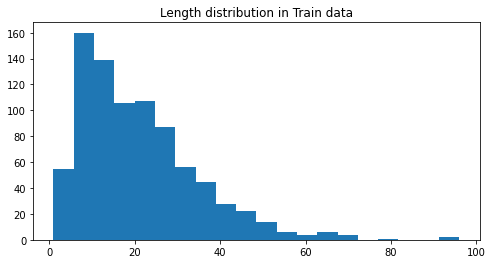

In [ ]:
length = map(len, [vars(x)['words'] for x in train_data.examples])

plt.figure(figsize=[8, 4])
plt.title("Length distribution in Train data")
plt.hist(list(length), bins=20);

Для обучения `BiLSTM` лучше использовать colab

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
import torch.optim as optim

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

Для более быстрого и устойчивого обучения сгруппируем наши данные по батчам

In [ ]:
# бьем нашу выборку на батч, не забывая сначала отсортировать выборку по длине
def _len_sort_key(x):
    return len(x.words)

BATCH_SIZE = 32

train_iterator, valid_iterator, test_iterator = BucketIterator.splits(
    (train_data, valid_data, test_data), 
    batch_size = BATCH_SIZE, 
    device = device,
    sort_key=_len_sort_key
)

In [ ]:
# посморим  на количество батчей
list(map(len, [train_iterator, valid_iterator, test_iterator]))

[27, 4, 4]

In [ ]:
next(iter(train_iterator))


[torchtext.data.batch.Batch of size 32]
	[.words]:[torch.cuda.LongTensor of size 37x32 (GPU 0)]
	[.tags]:[torch.cuda.LongTensor of size 37x32 (GPU 0)]

In [ ]:
next(iter(train_iterator)).tags[0]

tensor([ 9,  8,  8,  8,  7,  9,  4, 11,  3,  4,  7,  3,  9,  1,  9,  2,  4,  6,
         7,  5,  8, 10,  4,  7,  7, 11,  8,  2,  7,  9,  7,  8],
       device='cuda:0')

### Модель и её обучение

Инициализируем нашу модель

In [ ]:
class LSTMTagger(nn.Module):

    def __init__(self, embedding_dim, hidden_dim, vocab_size, tagset_size, dropout, bidirectional=False):  
        super().__init__()        
  
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.dropout =  nn.Dropout(dropout)
        
        self.rnn = nn.LSTM(input_size = embedding_dim, hidden_size = hidden_dim, num_layers = 2, 
                           bidirectional = bidirectional, dropout = dropout)  
        
        # если bidirectional, то предсказываем на основе конкатенации двух hidden
        self.tag = nn.Linear((1 + bidirectional) * hidden_dim, tagset_size, bias=False)

    def forward(self, sent):        
        #sent = [sent len, batch size]        
        # не забываем применить dropout к embedding
        embedded = self.embeddings(sent)
        embedded = self.dropout(embedded)
        output, _ = self.rnn(embedded)
        #output = [sent len, batch size, hid dim * n directions]
        prediction = self.tag(output)
        #prediction = F.log_softmax(prediction, dim=1) для nn.NLLLoss()    
        return prediction

In [ ]:
# параметры модели
VOCAB_SIZE = len(WORD.vocab) 
TARGET_SIZE = len(TAG.vocab)
EMBEDING_DIM = 256
HIDDEN_DIM = 256
DROPOUT = 0.2
BIDIRECTIONAL = True
PAD_IDX = TAG.vocab.stoi['<pad>']

model = LSTMTagger(EMBEDING_DIM, HIDDEN_DIM, VOCAB_SIZE, TARGET_SIZE, DROPOUT, BIDIRECTIONAL).to(device)

# инициализируем веса
def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.uniform_(param, -0.08, 0.08)
        
model.apply(init_weights);

Подсчитаем количество обучаемых параметров нашей модели

In [ ]:
def count_parameters(model):
    pytorch_total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    return pytorch_total_params

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 3,686,912 trainable parameters


Погнали обучать

In [ ]:
PAD_IDX = TAG.vocab.stoi['<pad>']
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss(ignore_index = PAD_IDX)

def train(model, iterator, optimizer, criterion, clip, train_history=None, valid_history=None):
    model.train()
    
    epoch_loss = 0
    history = []
    for i, batch in enumerate(iterator):
        
        model.zero_grad()
        words = batch.words
        tags = batch.tags
        output = model(words)        
        #tags = [sent len, batch size]
        #output = [sent len, batch size, output dim]        
        shape = output.shape
        output = output.resize(shape[0]*shape[1],shape[2])
        tags = tags.view(-1)        
        #tags = [sent len * batch size]
        #output = [sent len * batch size, output dim] 
        loss = criterion(output,tags)        
        loss.backward()        
        # Gradient clipping(решение проблемы взрыва граденты), clip - максимальная норма вектора
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=clip)        
        optimizer.step()        
        epoch_loss += loss.item()
        
        history.append(loss.cpu().data.numpy())
        if (i+1)%10==0:
            fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

            clear_output(True)
            ax[0].plot(history, label='train loss')
            ax[0].set_xlabel('Batch')
            ax[0].set_title('Train loss')
            
            if train_history is not None:
                ax[1].plot(train_history, label='general train history')
                ax[1].set_xlabel('Epoch')
            if valid_history is not None:
                ax[1].plot(valid_history, label='general valid history')
            plt.legend()
            
            plt.show()
        
    return epoch_loss / len(iterator)

def evaluate(model, iterator, criterion):
    model.eval()    
    epoch_loss = 0    
    history = []    
    with torch.no_grad():
    
        for i, batch in enumerate(iterator):

            words = batch.words
            tags = batch.tags
            output = model(words)
            #tags = [sent len, batch size]
            #output = [sent len, batch size, output dim]
            shape = output.shape
            output = output.resize(shape[0]*shape[1],shape[2])
            tags = tags.view(-1)
            #tags = [sent len * batch size]
            #output = [sent len * batch size, output dim]
            loss = criterion(output,tags)            
            epoch_loss += loss.item()
        
    return epoch_loss / len(iterator)

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

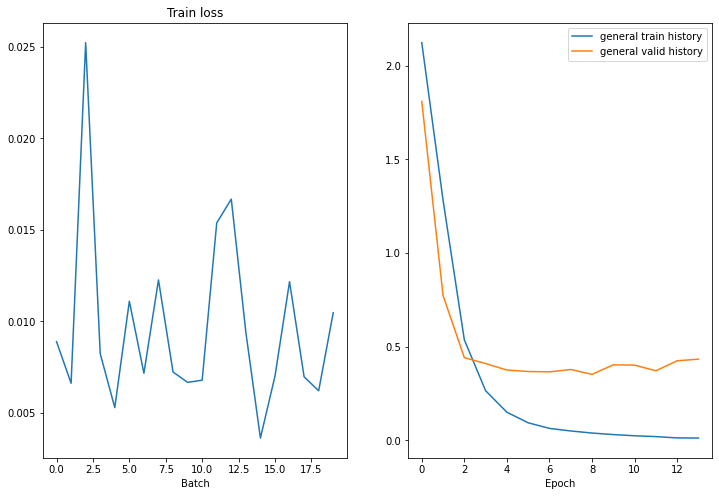

Epoch: 15 | Time: 0m 0s
	Train Loss: 0.010 | Train PPL:   1.010
	 Val. Loss: 0.387 |  Val. PPL:   1.473
CPU times: user 14.9 s, sys: 403 ms, total: 15.3 s
Wall time: 16.4 s


In [ ]:
%%time

import time
import math
import matplotlib
matplotlib.rcParams.update({'figure.figsize': (16, 12), 'font.size': 14})
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output

train_history = []
valid_history = []

N_EPOCHS = 15
CLIP = 2

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):
    
    start_time = time.time()
    
    train_loss = train(model, train_iterator, optimizer, criterion, CLIP, train_history, valid_history)
    valid_loss = evaluate(model, valid_iterator, criterion)
    
    end_time = time.time()
    
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'best-val-model.pt')

    train_history.append(train_loss)
    valid_history.append(valid_loss)
    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train PPL: {math.exp(train_loss):7.3f}')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. PPL: {math.exp(valid_loss):7.3f}')

### Применение модели

In [ ]:
def accuracy_model(model, iterator):
    model.eval()    
    true_pred = 0
    num_pred = 0    
    with torch.no_grad():
        for i, batch in enumerate(iterator):
            words = batch.words
            tags = batch.tags
            output = model(words)            
            #output = [sent len, batch size, output dim]
            # _, output_label = torch.max(output, 2)    
            # output = output_label.view(-1)
            output = output.argmax(dim=-1).view(-1)
            tags = tags.view(-1)            
            #output = [sent len, batch size]
            predict_tags = output.cpu().numpy()
            true_tags = tags.cpu().numpy()
            true_pred += np.sum((true_tags == predict_tags) & (true_tags != PAD_IDX))
            num_pred += np.prod(true_tags.shape) - (true_tags == PAD_IDX).sum()
        
    return round(true_pred / num_pred * 100, 2)

In [ ]:
accuracy_lstm_tagger = accuracy_model(model, test_iterator)

In [ ]:
print("Accuracy:", accuracy_lstm_tagger, '%')

Accuracy: 89.63 %


In [ ]:
pd_list.append({'model':'lstm_tagger','set':'humor','accuracy':accuracy_lstm_tagger})

In [ ]:
# качество моделей на данный момент
pd.DataFrame(pd_list).sort_values(by='accuracy', axis=0, ascending=False)

,model,set,accuracy
4,lstm_tagger,humor,89.630000
2,nltk pos_tag,humor,89.223925
0,hiddenMarkovModel,humor,88.828473
3,RNNMorphPredictor,humor,62.827484
1,DefaultTagger,humor,20.217499


Вы можете улучшить качество, изменяя параметры модели. Но чтобы добиться нужного качества, вам неообходимо взять все выборку, а не только категорию `humor`.

##Полный сэт

### LSTMTagger

In [ ]:
brown_tagged_sents = brown.tagged_sents(tagset="universal")

In [ ]:
pos_data = [list(zip(*sent)) for sent in brown_tagged_sents]

In [ ]:
# наши поля
WORD = Field(lower=True)
TAG = Field(unk_token=None) # все токены нам извсетны

# создаем примеры
examples = []
for words, tags in pos_data:
    examples.append(torchtext.data.Example.fromlist([list(words), list(tags)], fields=[('words', WORD), ('tags', TAG)]))

In [ ]:
# кладем примеры в наш датасет
dataset = torchtext.data.Dataset(examples, fields=[('words', WORD), ('tags', TAG)])

train_data, valid_data, test_data = dataset.split(split_ratio=[0.8, 0.1, 0.1])

print(f"Number of training examples: {len(train_data.examples)}")
print(f"Number of validation examples: {len(valid_data.examples)}")
print(f"Number of testing examples: {len(test_data.examples)}")

Number of training examples: 45872
Number of validation examples: 5734
Number of testing examples: 5734


In [ ]:
WORD.build_vocab(train_data, min_freq=1)
TAG.build_vocab(train_data)

print(f"Unique tokens in source (ru) vocabulary: {len(WORD.vocab)}")
print(f"Unique tokens in target (en) vocabulary: {len(TAG.vocab)}")

print(WORD.vocab.itos[::200])
print(TAG.vocab.itos)

Unique tokens in source (ru) vocabulary: 45031
Unique tokens in target (en) vocabulary: 13
['<unk>', 'fact', 'problems', 'religious', 'due', 'built', 'spread', 'robert', 'observed', 'won', 'properly', 'movements', 'essentially', 'employment', 'weapon', 'sacrifice', "world's", 'symphony', 'n.', 'frames', 'podger', 'tons', 'absolutely', '/', 'transom', 'spell', 'messages', 'cracked', 'sustained', 'leaning', 'broadcast', 'mix', 'blindness', 'louder', 'youngest', 'fruits', 'seeming', 'boot', 'honesty', 'retains', 'av.', 'ghost', 'populated', 'weeping', 'circus', 'generate', 'mouthpiece', 'securities', '$20', 'canvases', 'enrollment', 'jenks', 'plague', 'sprayed', "'round", 'breach', 'denounced', 'fritzie', 'kerosene', 'operetta', "richard's", 'sunk', 'youngster', 'authoritarian', 'claret', "devil's", 'fined', 'horace', 'lions', 'pad', 'recipients', 'snorted', 'transaction', '0.4', 'allusion', 'bewilderment', 'chick', 'cradled', 'docile', 'fasten', 'grant-in-aid', 'incentives', 'lain', 'men

In [ ]:
# бьем нашу выборку на батч, не забывая сначала отсортировать выборку по длине
def _len_sort_key(x):
    return len(x.words)

BATCH_SIZE = 256

train_iterator, valid_iterator, test_iterator = BucketIterator.splits(
    (train_data, valid_data, test_data), 
    batch_size = BATCH_SIZE, 
    device = device,
    sort_key=_len_sort_key
)

In [ ]:
# посморим  на количество батчей
list(map(len, [train_iterator, valid_iterator, test_iterator]))

[180, 23, 23]

In [ ]:
# параметры модели
VOCAB_SIZE = len(WORD.vocab) 
TARGET_SIZE = len(TAG.vocab)
EMBEDING_DIM = 256
HIDDEN_DIM = 256
DROPOUT = 0.2
BIDIRECTIONAL = True
PAD_IDX = TAG.vocab.stoi['<pad>']

model = LSTMTagger(EMBEDING_DIM, HIDDEN_DIM, VOCAB_SIZE, TARGET_SIZE, DROPOUT, BIDIRECTIONAL).to(device)

# инициализируем веса
def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.uniform_(param, -0.08, 0.08)
        
model.apply(init_weights);

In [ ]:
PAD_IDX = TAG.vocab.stoi['<pad>']
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss(ignore_index = PAD_IDX)

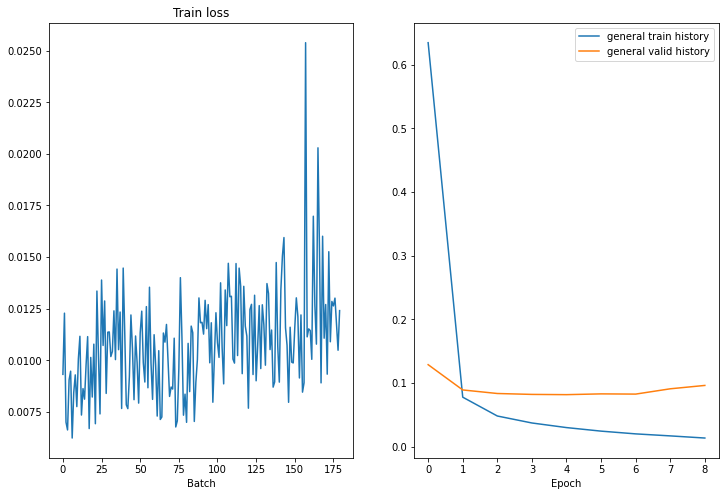

Epoch: 10 | Time: 0m 26s
	Train Loss: 0.011 | Train PPL:   1.011
	 Val. Loss: 0.101 |  Val. PPL:   1.106
CPU times: user 4min 21s, sys: 2.19 s, total: 4min 23s
Wall time: 4min 31s


In [ ]:
%%time

import time
import math
import matplotlib
matplotlib.rcParams.update({'figure.figsize': (16, 12), 'font.size': 14})
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output

train_history = []
valid_history = []

N_EPOCHS = 10
CLIP = 2

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):
    
    start_time = time.time()
    
    train_loss = train(model, train_iterator, optimizer, criterion, CLIP, train_history, valid_history)
    valid_loss = evaluate(model, valid_iterator, criterion)
    
    end_time = time.time()
    
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'best-val-model.pt')

    train_history.append(train_loss)
    valid_history.append(valid_loss)
    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train PPL: {math.exp(train_loss):7.3f}')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. PPL: {math.exp(valid_loss):7.3f}')

In [ ]:
accuracy_lstm_tagger_all_set = accuracy_model(model, test_iterator)

In [ ]:
print("Accuracy lstm_tagger:", accuracy_lstm_tagger_all_set, '%')

Accuracy lstm_tagger: 97.58 %


In [ ]:
pd_list.append({'model':'lstm_tagger_all','set':'all','accuracy':accuracy_lstm_tagger_all_set})

In [ ]:
# качество моделей на данный момент
pd.DataFrame(pd_list).sort_values(by='accuracy', axis=0, ascending=False)

,model,set,accuracy
5,lstm_tagger_all,all,97.580000
4,lstm_tagger,humor,89.630000
2,nltk pos_tag,humor,89.223925
0,hiddenMarkovModel,humor,88.828473
3,RNNMorphPredictor,humor,62.827484
1,DefaultTagger,humor,20.217499


Вам неоходимо добиться качества не меньше, чем `accuracy = 93 %` 

In [ ]:
best_model = LSTMTagger(EMBEDING_DIM, HIDDEN_DIM, VOCAB_SIZE, TARGET_SIZE, DROPOUT, BIDIRECTIONAL).to(device)
best_model.load_state_dict(torch.load('best-val-model.pt'))
assert accuracy_model(best_model, test_iterator) >= 93

Пример решение нашей задачи:

In [ ]:
def print_tags(model, data):
    model.eval()
    
    with torch.no_grad():
        words, _ = data
        example = torch.LongTensor([WORD.vocab.stoi[elem] for elem in words]).unsqueeze(1).to(device)
        
        output = model(example).argmax(dim=-1).cpu().numpy()
        tags = [TAG.vocab.itos[int(elem)] for elem in output]

        for token, tag in zip(words, tags):
            print(f'{token:15s}{tag}')

In [ ]:
print_tags(best_model, pos_data[-1])

From           VERB
what           DET
I              NOUN
was            VERB
able           ADJ
to             ADP
gauge          NOUN
in             ADP
a              DET
swift          ADJ
,              .
greedy         ADJ
glance         NOUN
,              .
the            DET
figure         NOUN
inside         ADP
the            DET
coral-colored  ADJ
boucle         NOUN
dress          NOUN
was            VERB
stupefying     VERB
.              .


### HiddenMarkovModel

In [ ]:
brown_tagged_sents = brown.tagged_sents(tagset="universal")
# Приведем слова к нижнему регистру
my_brown_tagged_sents = []
for sent in brown_tagged_sents:
    my_brown_tagged_sents.append(list(map(lambda x: (x[0].lower(), x[1]), sent)))
my_brown_tagged_sents = np.array(my_brown_tagged_sents)

from sklearn.model_selection import train_test_split
train_sents, test_sents = train_test_split(my_brown_tagged_sents, test_size=0.1, random_state=0,) #'''your code'''

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


In [ ]:
print(len(train_sents))
print(len(test_sents))

51606
5734


In [ ]:
model_HiddenMarkovModel = HiddenMarkovModel()

In [ ]:
%%time
model_HiddenMarkovModel.fit(train_sents);

CPU times: user 6min 20s, sys: 25.4 s, total: 6min 45s
Wall time: 6min 20s


In [ ]:
%%time
accuracy_hmm_all_set = accuracy_score_hmm(model_HiddenMarkovModel, test_sents)

CPU times: user 31min 45s, sys: 12.8 s, total: 31min 58s
Wall time: 31min 43s


In [ ]:
print("Accuracy hmm for all set:", accuracy_hmm_all_set, '%')

Accuracy hmm for all set: 96.26295331104619 %


In [ ]:
pd_list.append({'model':'hiddenMarkovModel','set':'all','accuracy':accuracy_hmm_all_set})

In [ ]:
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
pd_model_acc = pd.DataFrame(pd_list).sort_values(by='accuracy', axis=0, ascending=False)

In [ ]:
pd_model_acc.to_csv('pd_model_acc.csv')

## Сравните результаты моделей HiddenMarkov, LstmTagger:
* при обучение на маленькой части корпуса, например, на категории humor
* при обучении на всем корпусе

Результаты исследований были собраны в таблицу ниже:

In [ ]:
pd_model_acc

,model,set,accuracy
5,lstm_tagger_all,all,97.58
6,hiddenMarkovModel,all,96.26
4,lstm_tagger,humor,89.63
2,nltk pos_tag,humor,89.22
0,hiddenMarkovModel,humor,88.83
3,RNNMorphPredictor,humor,62.83
1,DefaultTagger,humor,20.22


**Выводы**

- Наилучшие результаты на полном датасете показала модель lstm_tagger с accuracy = 97.6. 
- На небольшой части датасета humor также выигрывает по точности модель lstm_tagger с accuracy = 89.63
- модель hiddenMarkovModel как на полном датасете, так и на humor показала меньшую точность. Соответственно 96.26 на полном, и 88.83 на humor. 
- модель hiddenMarkovModel учиться значительно быстрее чем реккурентная lstm_tagger

**Наш выбор - lstm_tagger, но при условии, что есть ресурс и время на обучение.**